This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 03 - Template Matching
**Professor:** Dr. Christoforos Christoforou


In the course, we introduced template matching as one use-case, where we use **filters as feature extractors**. In particular, by using a small image of an object (template image) we want to detect as a kernel, and then calculating the cross-correlation of that kernel with the search image, we can obtain a 2D **intermediate representation** where each entry captures the similarity between the template image to each location of the search image. 

Subsequently, by searching for local picks in the **intermediate representation** we are able to identify the specific location the query object is found in the search image. 

In this problem set you are expected to practice the concepts covered in class. 


## Exercise 1 Template matching using OpenCV

Template matching is a very common and useful technique in computer vision. OpenCV library provides two useful functions that implement template matching and object detections. These are the functions 

* `cv2.matchTemplate()` which performs the convolution of the query image with the search image, and 
* `cv2.matchTemplate()` which can identify the local maximum in the `intermediate representation`  

As part of this task, you are expected to read the [OpenCV tutorial]( 
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html) and reproduce the code shown therein. 

Show an example, were you use the images provided by openCV and an example where you use your own images. 

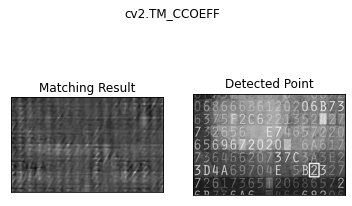

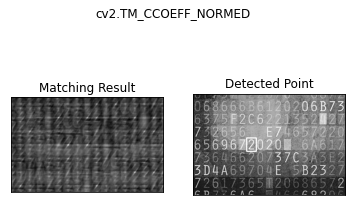

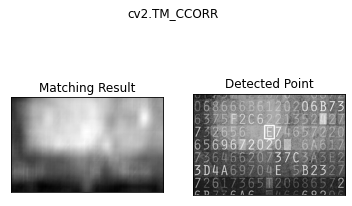

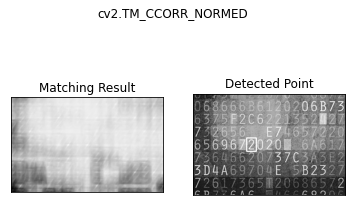

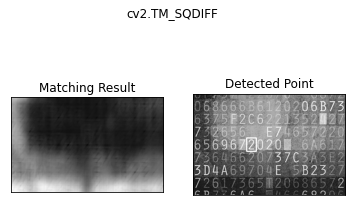

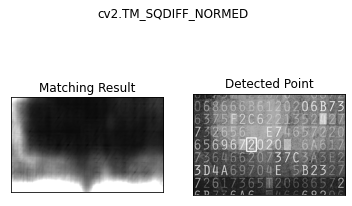

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image

img = cv2.imread('C:/Users/Ryan/OneDrive/Desktop/random_nums.jpg',0)
img2 = img.copy()
template = cv2.imread('C:/Users/Ryan/OneDrive/Desktop/number_2.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

## Exercise 2: Template matching from scratch

In this exercise, you will be writing your own function to implement template matching  from scratch. More specifically, you will implement the simplified version of the function `cv2.matchTemplate()`. You function need to perform template matching using normalized correlations (i.e. the method `CV_TM_CCORR_NORMED`). You can find the exact formula for the normalized correlation method [here](https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html#how-does-it-work)




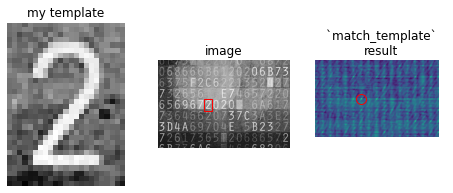

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template
import cv2
from IPython.display import Image

def my_matchTemplate(): 
    image = cv2.imread('C:/Users/Ryan/OneDrive/Desktop/random_nums.jpg',0)
    template = cv2.imread('C:/Users/Ryan/OneDrive/Desktop/number_2.jpg',0)

    result = match_template(image, template)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]

    fig = plt.figure(figsize=(8, 3))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

    ax1.imshow(template, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('my template')

    ax2.imshow(image, cmap=plt.cm.gray)
    ax2.set_axis_off()
    ax2.set_title('image')
    # highlight matched region
    htemp, wtemp = template.shape
    rect = plt.Rectangle((x, y), wtemp, htemp, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)

    ax3.imshow(result)
    ax3.set_axis_off()
    ax3.set_title('`match_template`\nresult')
    # highlight matched region
    ax3.autoscale(False)
    ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

    plt.show()
    

my_matchTemplate()

## Exercise 3: Test your implementation

Demonstrate the correctness of your `my_matchTemplate` function implementation from Exercise 2, by applying it to different images. Compare the output of your function to the corresponding output from when using cv.my_matchTemplate method provided by openCV library (i.e. show the two results side by side). Moreover, report (empirical) time  each method takes to complete (i.e. time both your and openCV implementation). 

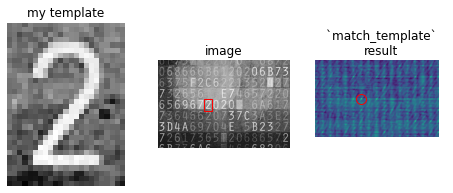

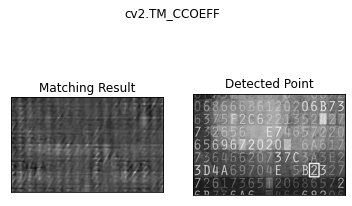

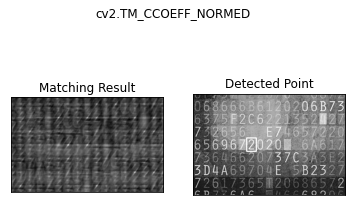

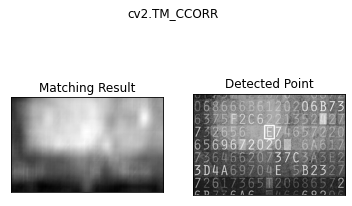

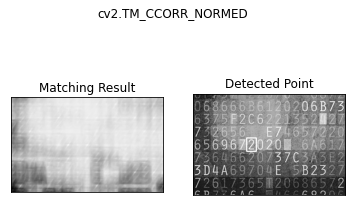

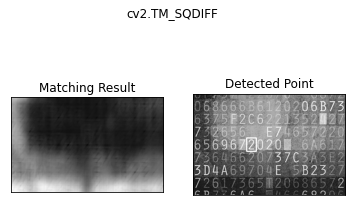

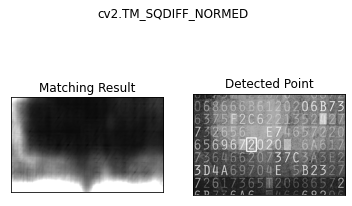

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template
import cv2
from IPython.display import Image

def my_matchTemplate(): 
    image = cv2.imread('C:/Users/Ryan/OneDrive/Desktop/random_nums.jpg',0)
    template = cv2.imread('C:/Users/Ryan/OneDrive/Desktop/number_2.jpg',0)

    result = match_template(image, template)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]

    fig = plt.figure(figsize=(8, 3))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

    ax1.imshow(template, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('my template')

    ax2.imshow(image, cmap=plt.cm.gray)
    ax2.set_axis_off()
    ax2.set_title('image')
    # highlight matched region
    htemp, wtemp = template.shape
    rect = plt.Rectangle((x, y), wtemp, htemp, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)

    ax3.imshow(result)
    ax3.set_axis_off()
    ax3.set_title('`match_template`\nresult')
    # highlight matched region
    ax3.autoscale(False)
    ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

    plt.show()
    
def cv2_template():
    img = cv2.imread('C:/Users/Ryan/OneDrive/Desktop/random_nums.jpg',0)
    img2 = img.copy()
    template = cv2.imread('C:/Users/Ryan/OneDrive/Desktop/number_2.jpg',0)
    w, h = template.shape[::-1]

    # All the 6 methods for comparison in a list
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
                'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

    for meth in methods:
        img = img2.copy()
        method = eval(meth)

        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv2.rectangle(img,top_left, bottom_right, 255, 2)

        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)
        plt.show()
        
        
my_matchTemplate()
cv2_template()

Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.